In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Others
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [3]:
data=pd.read_csv("data/reviews_simple_preprocessed.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1200 non-null   object 
 1   body                1200 non-null   object 
 2   rating_item         800 non-null    float64
 3   rating_delivery     800 non-null    float64
 4   rating_seller       800 non-null    float64
 5   rating_marketplace  800 non-null    float64
 6   rating_total        1200 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 65.8+ KB


In [4]:
data.head()

,title,body,rating_item,rating_delivery,rating_seller,rating_marketplace,rating_total
0,i recently purchased a mobile phone and i must...,a solid purchase by experience with this mobil...,3.0,NaN,NaN,NaN,3
1,i recently received a new mobile phone in the ...,pleasant purchase experience by thought on a n...,NaN,1.0,5.0,1.0,4
2,i recently purchased a new mobile phone and al...,pleasantly surprised by the feature of this mo...,3.0,NaN,NaN,NaN,4
3,i recently made a purchase for a new mobile ph...,average experience with my new mobile shone de...,5.0,NaN,2.0,2.0,3
4,i recently purchased a mobile phone from an on...,boxing the shone a neutral review regarding th...,NaN,NaN,NaN,3.0,3


In [5]:
data.isna().sum().sum()

1600

In [6]:
data.info()
df=data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1200 non-null   object 
 1   body                1200 non-null   object 
 2   rating_item         800 non-null    float64
 3   rating_delivery     800 non-null    float64
 4   rating_seller       800 non-null    float64
 5   rating_marketplace  800 non-null    float64
 6   rating_total        1200 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 65.8+ KB


In [7]:
df['rating_total'] = df['rating_total'].fillna(0)
df['rating_total'] = df['rating_total'].astype(int)
df.head(5)

,title,body,rating_item,rating_delivery,rating_seller,rating_marketplace,rating_total
0,i recently purchased a mobile phone and i must...,a solid purchase by experience with this mobil...,3.0,NaN,NaN,NaN,3
1,i recently received a new mobile phone in the ...,pleasant purchase experience by thought on a n...,NaN,1.0,5.0,1.0,4
2,i recently purchased a new mobile phone and al...,pleasantly surprised by the feature of this mo...,3.0,NaN,NaN,NaN,4
3,i recently made a purchase for a new mobile ph...,average experience with my new mobile shone de...,5.0,NaN,2.0,2.0,3
4,i recently purchased a mobile phone from an on...,boxing the shone a neutral review regarding th...,NaN,NaN,NaN,3.0,3


<Axes: xlabel='rating_seller', ylabel='count'>

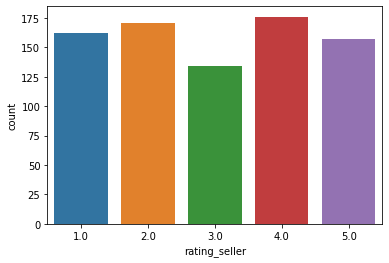

In [8]:
#count plot for all the data
sns.countplot(x = df['rating_seller'] , data = df)

In [9]:
!pip install neattext
from sklearn.multioutput import MultiOutputClassifier
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
df['title']=df['title'].str.lower()
df.fillna(0,inplace =True)
df.head()

,title,body,rating_item,rating_delivery,rating_seller,rating_marketplace,rating_total
0,i recently purchased a mobile phone and i must...,a solid purchase by experience with this mobil...,3.0,0.0,0.0,0.0,3
1,i recently received a new mobile phone in the ...,pleasant purchase experience by thought on a n...,0.0,1.0,5.0,1.0,4
2,i recently purchased a new mobile phone and al...,pleasantly surprised by the feature of this mo...,3.0,0.0,0.0,0.0,4
3,i recently made a purchase for a new mobile ph...,average experience with my new mobile shone de...,5.0,0.0,2.0,2.0,3
4,i recently purchased a mobile phone from an on...,boxing the shone a neutral review regarding th...,0.0,0.0,0.0,3.0,3


In [11]:
Xfeatures=df['title']
ylabels=df[['rating_item','rating_delivery','rating_seller','rating_marketplace']]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=7)

In [13]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),
                          ('lr_multi',MultiOutputClassifier(LogisticRegression()))])

In [14]:
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr_multi',
                 MultiOutputClassifier(estimator=LogisticRegression()))])

In [15]:
pipe_lr.score(x_test,y_test)

0.022222222222222223

In [16]:
pipe_knn = Pipeline(steps=[('cv',CountVectorizer()),('knn',MultiOutputClassifier(KNeighborsClassifier(n_neighbors=10)))])

In [17]:
pipe_knn.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('knn',
                 MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=10)))])

In [18]:
ex1 = x_test.iloc[0]

In [19]:
pipe_knn.predict([ex1])

array([[0., 0., 0., 3.]])

In [20]:
pipe_knn.score(x_test,y_test)

0.005555555555555556